### Credit Card Fraud Detection

This jupyter notebook is based on Anomaly detection of Credit Card transactions.


### Credit Card dataset

The Credit card fraud detection is a dataset with about 284807 rows and 28 features which affect the decision. The dataset is highly unbalanced with about 99.82% of the transactions being normal and only 0.17% fraud transactions. The dataset has to be resampled before applying any machine learning algorithm.


In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
#Read data from csv file
data = pd.read_csv("C:\Users\user\Downloads\creditcardfraud\creditcard.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,u'Frequency')

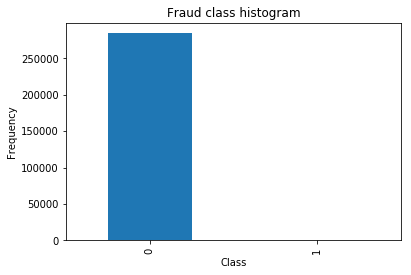

In [6]:
#Get data distribution
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
# now let us check in the number of Percentage
Count_Normal_transaction = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transaction = len(data[data["Class"]==1]) # fraud by 1
print(" Total Normal transactions: " ,Count_Normal_transaction)
print(" Total Fraud transactions: " ,Count_Fraud_transaction)
total_transactions = Count_Normal_transaction + Count_Fraud_transaction
print("Total transactions: ", total_transactions)
Percentage_of_Normal_transaction =  (float)(Count_Normal_transaction * 100) / total_transactions
print("percentage of normal transaction is",Percentage_of_Normal_transaction)
Percentage_of_Fraud_transaction= (float)(Count_Fraud_transaction * 100)/total_transactions 
print("percentage of fraud transaction",Percentage_of_Fraud_transaction)

(' Total Normal transactions: ', 284315)
(' Total Fraud transactions: ', 492)
('Total transactions: ', 284807)
('percentage of normal transaction is', 99.827251436938)
('percentage of fraud transaction', 0.1727485630620034)


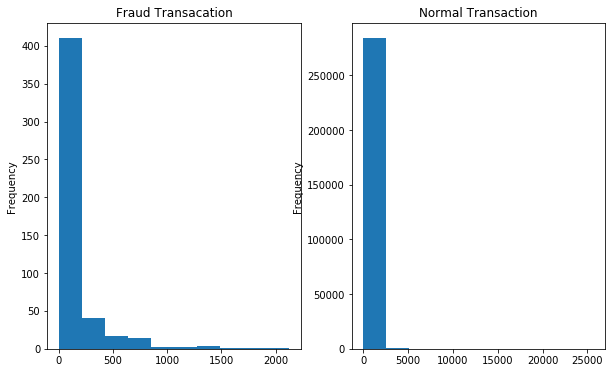

In [8]:
#amount of valid transactions and fraud transactions
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

In [9]:
#Summary statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5,1,u'Class Pie Chart')

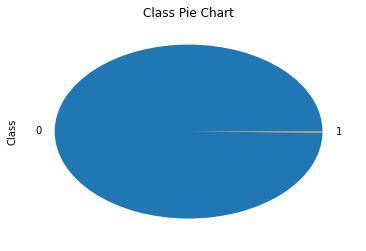

In [10]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'pie')
plt.title("Class Pie Chart")

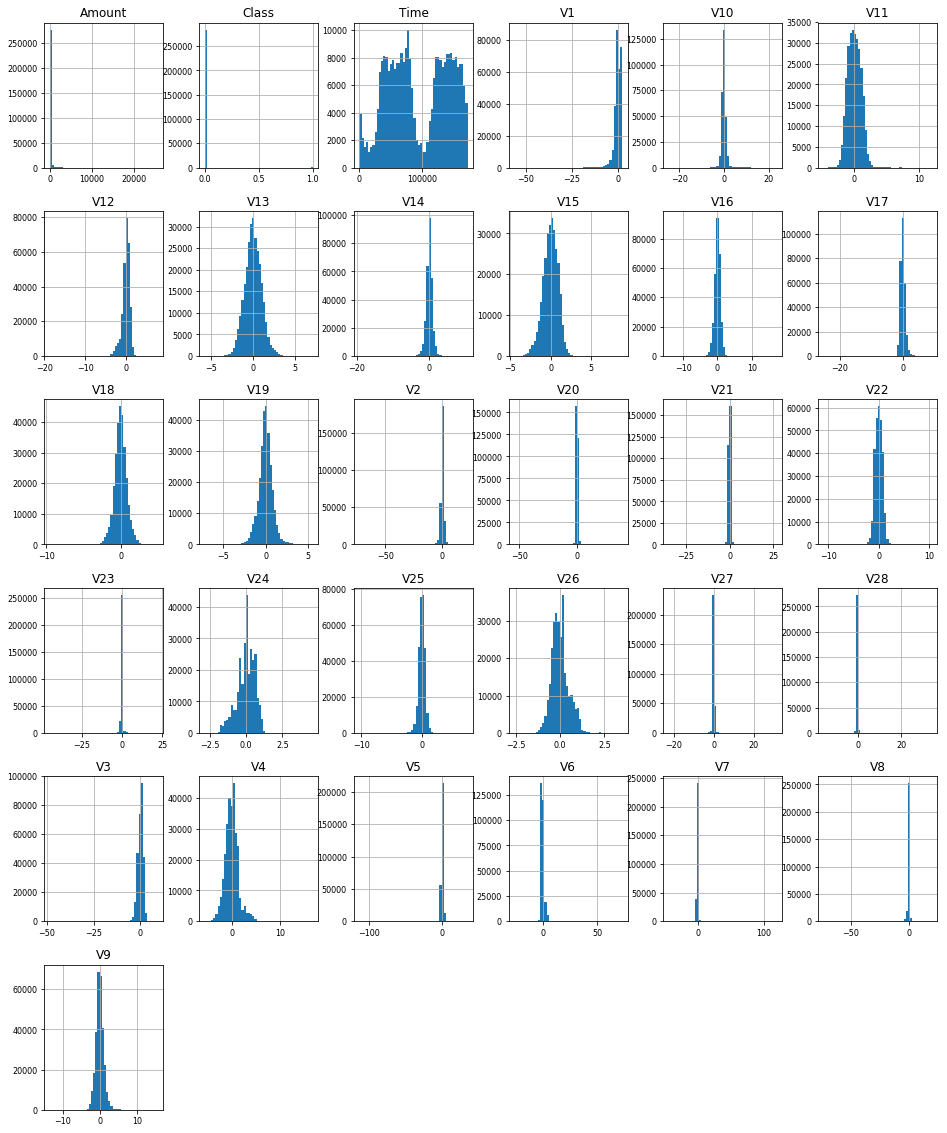

In [11]:
#Plot each colmun as appropriate for the data type
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

There is 0 strongly correlated values with Class:
Series([], Name: Class, dtype: float64)


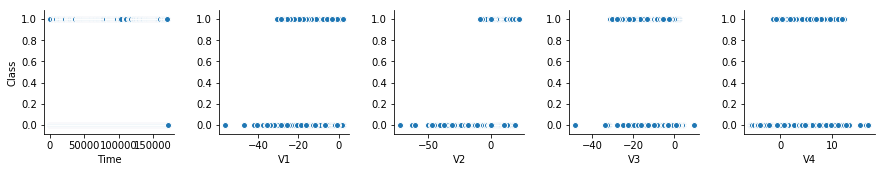

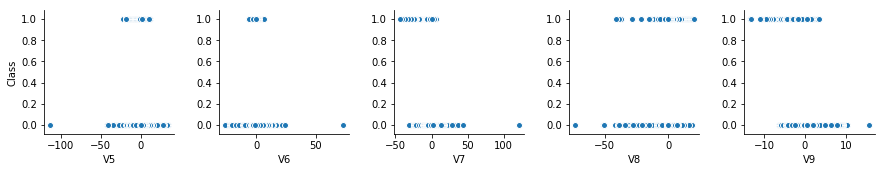

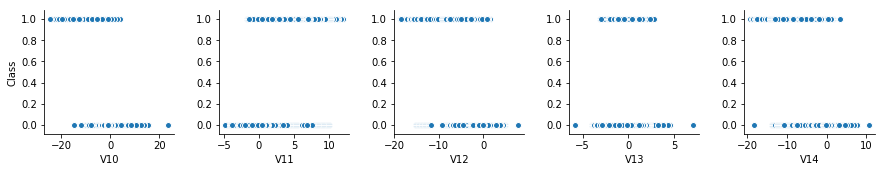

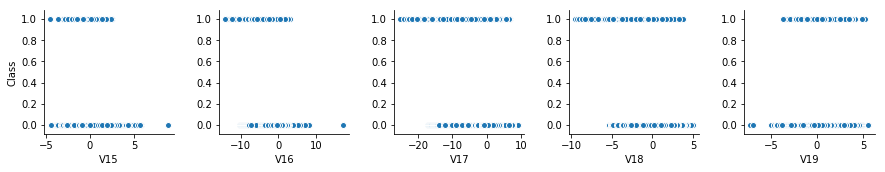

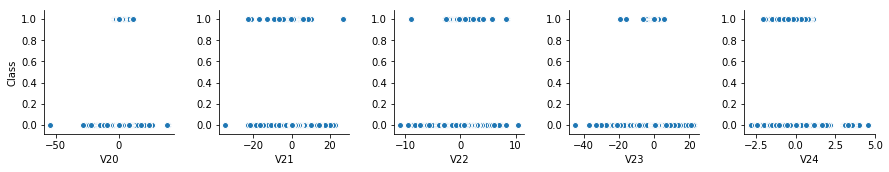

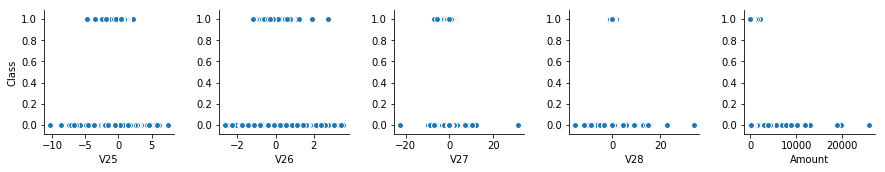

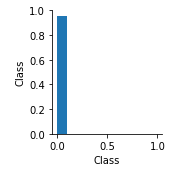

In [12]:
#Are any of the columns correlated?
import seaborn as sns
data_corr = data.corr()['Class'][:-1] # -1 because the latest row is Class
golden_features_list = data_corr[abs(data_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Class:\n{}".format(len(golden_features_list), golden_features_list))
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['Class'])

In [13]:
import operator

individual_features_df = []
for i in range(0, len(data.columns) - 1): # -1 because the last column is Class
    tmpDf = data[[data.columns[i], 'Class']]
    tmpDf = tmpDf[tmpDf[data.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Class'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

            V17: -0.326481067243
            V14: -0.302543695803
            V12: -0.260592924876
            V10:  -0.21688294364
            V16: -0.196538940303
             V3: -0.192960827067
             V7: -0.187256591514
            V18: -0.111485253889
             V1: -0.101347298595
             V9: -0.0977326860738
             V5: -0.0949742989912
             V6: -0.0436431606998
           Time: -0.0123233267387
            V24: -0.00722090671593
            V13: -0.00456977879945
            V15: -0.00422340226784
            V23: -0.00268515574024
            V22: 0.000805317505296
            V25: 0.00330770559729
            V26: 0.00445539750127
         Amount: 0.00653263237997
            V28: 0.00953604091621
            V27: 0.0175797281895
             V8: 0.0198751239147
            V20: 0.0200903241969
            V19: 0.0347830130364
            V21: 0.0404133806105
             V2: 0.0912886503443
             V4:  0.133447486239
            V11:  0.15487

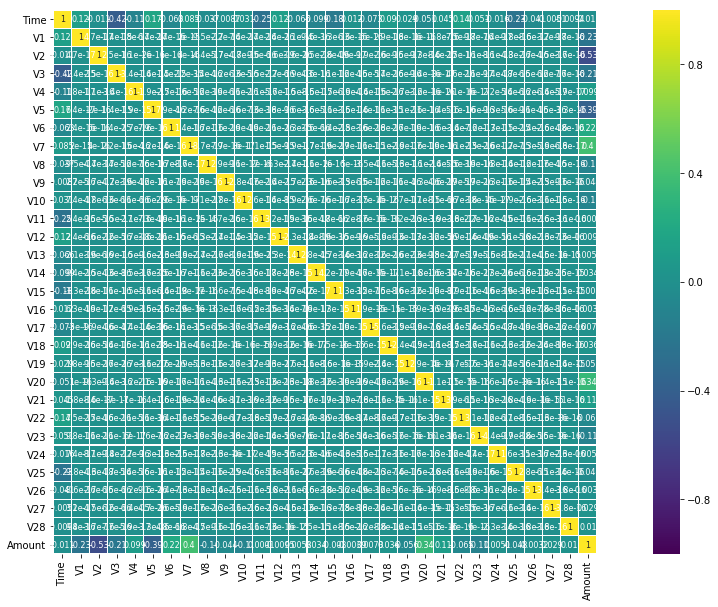

In [14]:
corr = data.drop('Class', axis=1).corr() # We already examined Class correlations
plt.figure(figsize=(20, 10))

sns.heatmap(corr[(corr <= 0.5) | (corr >= -0.004)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);

In [15]:
#Normalize the amount and time feature as they have no influence on the data.
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables
that determine an outcome (i.e V1 to V28 determine Class). The outcome is measured with a dichotomous variable (i.e. 
Class in which there are only two possible outcomes i.e. Normal or Fraud).
In logistic regression, the dependent variable(i.e Class) is binary or dichotomous, i.e. it only contains data coded as
1 (TRUE i.e. Fraud Class) or 0 (FALSE i.e. Normal Class ).

### Resampling of data

Resampling has to be performed since the data is highly unbalanced and the output can be an overfitted model.
There are many methods of resampling like oversampling, under sampling, SMOTE etc. 
We will be using under sampling for this dataset to create 50:50 ratio of both classes. 

In [ ]:
import sys
X = data.ix[:,data.columns != "Class"]
Y = data.ix[:, data.columns == "Class"]

In [17]:
#under sample the majority class i.e  normal class
#Number of data points in the minority class i.e fraud class
no_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, no_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", (float)(len(under_sample_data[under_sample_data.Class == 0]))/len(under_sample_data))
print("Percentage of fraud transactions: ", (float)(len(under_sample_data[under_sample_data.Class == 1]))/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

('Percentage of normal transactions: ', 0.5)
('Percentage of fraud transactions: ', 0.5)
('Total number of transactions in resampled data: ', 984)


In [18]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

C:\Users\user\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('Number transactions train dataset: ', 213605)
('Number transactions test dataset: ', 71202)
('Total number of transactions: ', 284807)

('Number transactions train dataset: ', 688)
('Number transactions test dataset: ', 296)
('Total number of transactions: ', 984)


In [19]:
#import sklearn for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [20]:
#Cross Validation
#Kfold
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),4,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean Recall Score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [21]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.96808510638297873)
('Iteration ', 2, ': recall score = ', 0.94999999999999996)
('Iteration ', 3, ': recall score = ', 0.97647058823529409)
('Iteration ', 4, ': recall score = ', 0.96511627906976749)

('Mean recall score ', 0.96491799342201001)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.86170212765957444)
('Iteration ', 2, ': recall score = ', 0.88749999999999996)
('Iteration ', 3, ': recall score = ', 0.94117647058823528)
('Iteration ', 4, ': recall score = ', 0.91860465116279066)

('Mean recall score ', 0.90224581235265)

-------------------------------------------
('C parameter: ', 1)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.87234042553191493)
('Iteration ', 2, ': recall score = 

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [22]:
#confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

('Recall metric in the testing dataset: ', 0.93197278911564629)


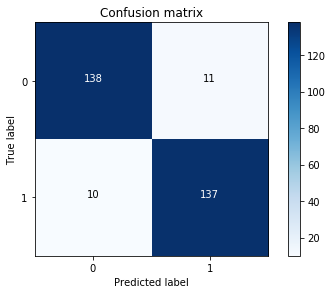

In [23]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", (float)(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

('Recall metric in the testing dataset: ', 0.94166666666666665)


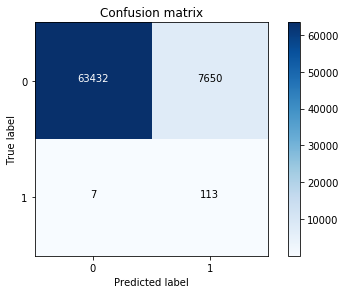

In [24]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", (float)(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

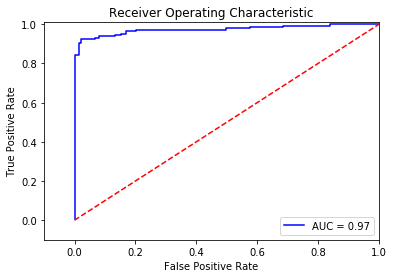

In [39]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RESULTS
An ROC curve is the most commonly used way to visualize the performance of a binary classifier, and AUC is (arguably) the best way to summarize its performance in a single number. Logistic Regression uses this in order to evaluate performance as it is a binary classifier algorithm. For this model, we get an AUC of 0.96 which is very high. Hence, it can be considered to be a good model.

### REFERENCE
1. https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/
2. https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python"
3. https://www.kaggle.com/dalpozz/creditcardfraud
4. https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now